In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
# use a markov chain to simulate income and employment

In [3]:
state_diagram = {
    'employed' : {
        'employed' : 0.90,
        'unemployed' : 0.10
    },
    'unemployed' : {
        'unemployed' : 0.60,
        'employed' : 0.40
    }
}

In [4]:
current_state = 'employed'

In [5]:
iterations = 10 * 12

In [6]:
employment_history = [current_state]

# not proud of this... but I'm here for the statistical results
for period in range(iterations):
    next_state = numpy.random.multinomial(
        n = 1, 
        pvals = list(state_diagram[current_state].values()),
        size = 1
    )[0]
    next_state = list(next_state).index(1)
    current_state = list(state_diagram[current_state].keys())[next_state]
    employment_history.append(current_state)

In [7]:
income = {
    'employed' : 4000,
    'unemployed' : 0
}

In [8]:
income_history = [income[elem] for elem in employment_history]

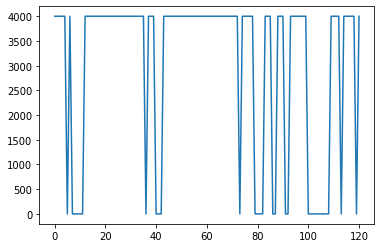

In [9]:
plt.plot(income_history)
plt.show()

In [10]:
# priority of payments
# in finance each level is sometimes called a tranch

# using dictionaries as anonymous types... probably bad practise
payment_order = [
    {
        'name': 'food',
        'cost_per_period': 1000,
        'history': []
    },
    {
        'name': 'mortgage',
        'cost_per_period': 1500,
        'history': []
    },
    {
        'name': 'sports',
        'cost_per_period': 500,
        'history': []
    }
]

In [11]:
# savings / buffering

current_savings = 10000
savings_history = [current_savings]

for income in income_history:
    current_savings += income
    for payment in payment_order:
        if current_savings >= payment['cost_per_period']:
            payment['history'].append(payment['cost_per_period'])
            current_savings -= payment['cost_per_period']
        else:
            payment['history'].append(current_savings)
            current_savings = 0
    # the last implicite payment is to our savings
    # this has the lowest precedent
    savings_history.append(current_savings)

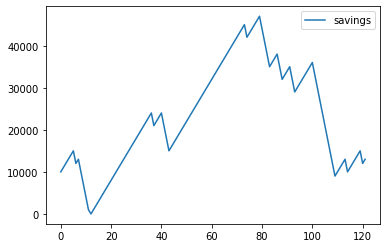

In [12]:
plt.plot(savings_history, label = 'savings')
plt.legend(loc='best')
plt.show()

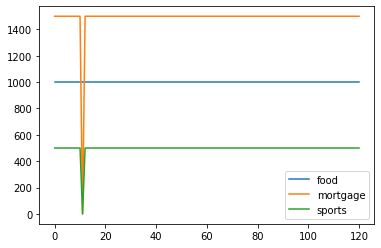

In [14]:
for payment in payment_order:
    plt.plot(payment['history'], label = payment['name'])
plt.legend(loc='best')
plt.show()

In [15]:
# What happens when we have multiple sources of income?

# What happens when we factor in inflation?
# Mortgage payments may remain fixed but food costs increase?

# Out of 100 simulations, how many lead to a mortgage default or worse starvation?

# Can our simulation afford children? A tranch that would have the highest priority.

# Hey Buddy, Uncle Sam wants his cut... Yup, I forgot to include taxes.

# Food for thought:
i = 0.03
n = 25
monthly_payments = 1500

monthly_payments * (1 - (1 + i / 12)**(-n*12)) / (i / 12)

316314.68000997114